In [1]:
import numpy as np
import pandas as pd
import csv
import os
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.grid_search import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier 
from sklearn.tree import DecisionTreeClassifier

os.getcwd()

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/cross_validation.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


'/Users/maccon/Desktop/210'

In [2]:
data = pd.read_csv('./Baseline.csv', sep=',')
labels = pd.read_csv('./Labels.csv', sep=',')
data = data[0:8044]
print (data.shape)
print (labels.shape)


(8044, 22)
(8044, 1)


In [3]:
np.random.seed(0)
msk = np.random.rand(data.shape[0]) < 0.75

split_train_data = data[msk]
split_train_labels = labels[msk]

split_test_data = data[~msk]
split_test_labels = labels[~msk]

print (split_test_data.shape)
print (split_test_labels.shape)
print (split_train_data.shape)
print (split_train_labels.shape)

(1978, 22)
(1978, 1)
(6066, 22)
(6066, 1)


In [4]:
def KNN(k):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(split_train_data, split_train_labels)
    test_preds = knn.predict(split_test_data)
    print ("K:", k, "F1:", metrics.accuracy_score(split_test_labels, test_preds))


for i in [1,3,5,7,9,11,13,15]:
    KNN(i)

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  app.launch_new_instance()


K: 1 F1: 0.686552072801
K: 3 F1: 0.718402426694
K: 5 F1: 0.729019211325
K: 7 F1: 0.743174924166
K: 9 F1: 0.747219413549
K: 11 F1: 0.74570273003
K: 13 F1: 0.747219413549
K: 15 F1: 0.748230535895


In [5]:
rfc = RandomForestClassifier(n_estimators=500)
rfc.fit(split_train_data, split_train_labels)

print ('Accuracy (a random forest):', rfc.score(split_test_data, split_test_labels))

abc = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1), n_estimators=500, learning_rate=0.1)

abc.fit(split_train_data, split_train_labels)
print ('Accuracy (adaboost with decision trees):', abc.score(split_test_data, split_test_labels))

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


Accuracy (a random forest): 0.794236602629


/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/utils/validation.py:529: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy (adaboost with decision trees): 0.796258847321


In [6]:
for c in [0.0001, 0.001, 0.01, 0.1, 1.0, 2.0, 5.0, 50, 100]:
    logreg = LogisticRegression(C=c, penalty='l1')
    logreg.fit(split_train_data, split_train_labels)
    logregPred = logreg.predict(split_test_data)
    print("C:", c, "F1:", metrics.accuracy_score(split_test_labels,logregPred))

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/utils/validation.py:529: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C: 0.0001 F1: 0.774014155713
C: 0.001 F1: 0.77350859454
C: 0.01 F1: 0.776541961577
C: 0.1 F1: 0.802325581395
C: 1.0 F1: 0.806875631951
C: 2.0 F1: 0.806370070779
C: 5.0 F1: 0.805864509606
C: 50 F1: 0.805864509606
C: 100 F1: 0.807886754297


In [8]:
labels2 = pd.read_csv('./Labels2.csv', sep=',')
print (labels2.shape)

(8044, 1)


In [9]:
np.random.seed(0)
msk2 = np.random.rand(data.shape[0]) < 0.75

split_train_data2 = data[msk2]
split_train_labels2 = labels2[msk2]

split_test_data2 = data[~msk2]
split_test_labels2 = labels2[~msk2]

print (split_test_data2.shape)
print (split_test_labels2.shape)
print (split_train_data2.shape)
print (split_train_labels2.shape)

(1978, 22)
(1978, 1)
(6066, 22)
(6066, 1)


In [10]:
def KNN(k):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(split_train_data2, split_train_labels2)
    test_preds = knn.predict(split_test_data2)
    print ("K:", k, "F1:", metrics.accuracy_score(split_test_labels2, test_preds))


for i in [1,3,5,7,9,11,13,15]:
    KNN(i)

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  app.launch_new_instance()


K: 1 F1: 0.623356926188
K: 3 F1: 0.672901921132
K: 5 F1: 0.680485338726
K: 7 F1: 0.693124368049
K: 9 F1: 0.699696663296
K: 11 F1: 0.705257836198
K: 13 F1: 0.703741152679
K: 15 F1: 0.7108190091


In [11]:
rfc = RandomForestClassifier(n_estimators=500)
rfc.fit(split_train_data2, split_train_labels2)

print ('Accuracy (a random forest):', rfc.score(split_test_data2, split_test_labels2))

abc = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1), n_estimators=500, learning_rate=0.1)

abc.fit(split_train_data2, split_train_labels2)
print ('Accuracy (adaboost with decision trees):', abc.score(split_test_data2, split_test_labels2))

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


Accuracy (a random forest): 0.835187057634


/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/utils/validation.py:529: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy (adaboost with decision trees): 0.824570273003


In [12]:
for c in [0.0001, 0.001, 0.01, 0.1, 1.0, 2.0, 5.0, 50, 100]:
    logreg = LogisticRegression(C=c, penalty='l1')
    logreg.fit(split_train_data2, split_train_labels2)
    logregPred = logreg.predict(split_test_data2)
    print("C:", c, "F1:", metrics.accuracy_score(split_test_labels2,logregPred))

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/utils/validation.py:529: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C: 0.0001 F1: 0.744186046512
C: 0.001 F1: 0.748230535895
C: 0.01 F1: 0.790697674419
C: 0.1 F1: 0.82052578362
C: 1.0 F1: 0.824570273003
C: 2.0 F1: 0.82406471183
C: 5.0 F1: 0.825075834176
C: 50 F1: 0.826592517695
C: 100 F1: 0.825581395349


99% explained variance achieved at: 1 components


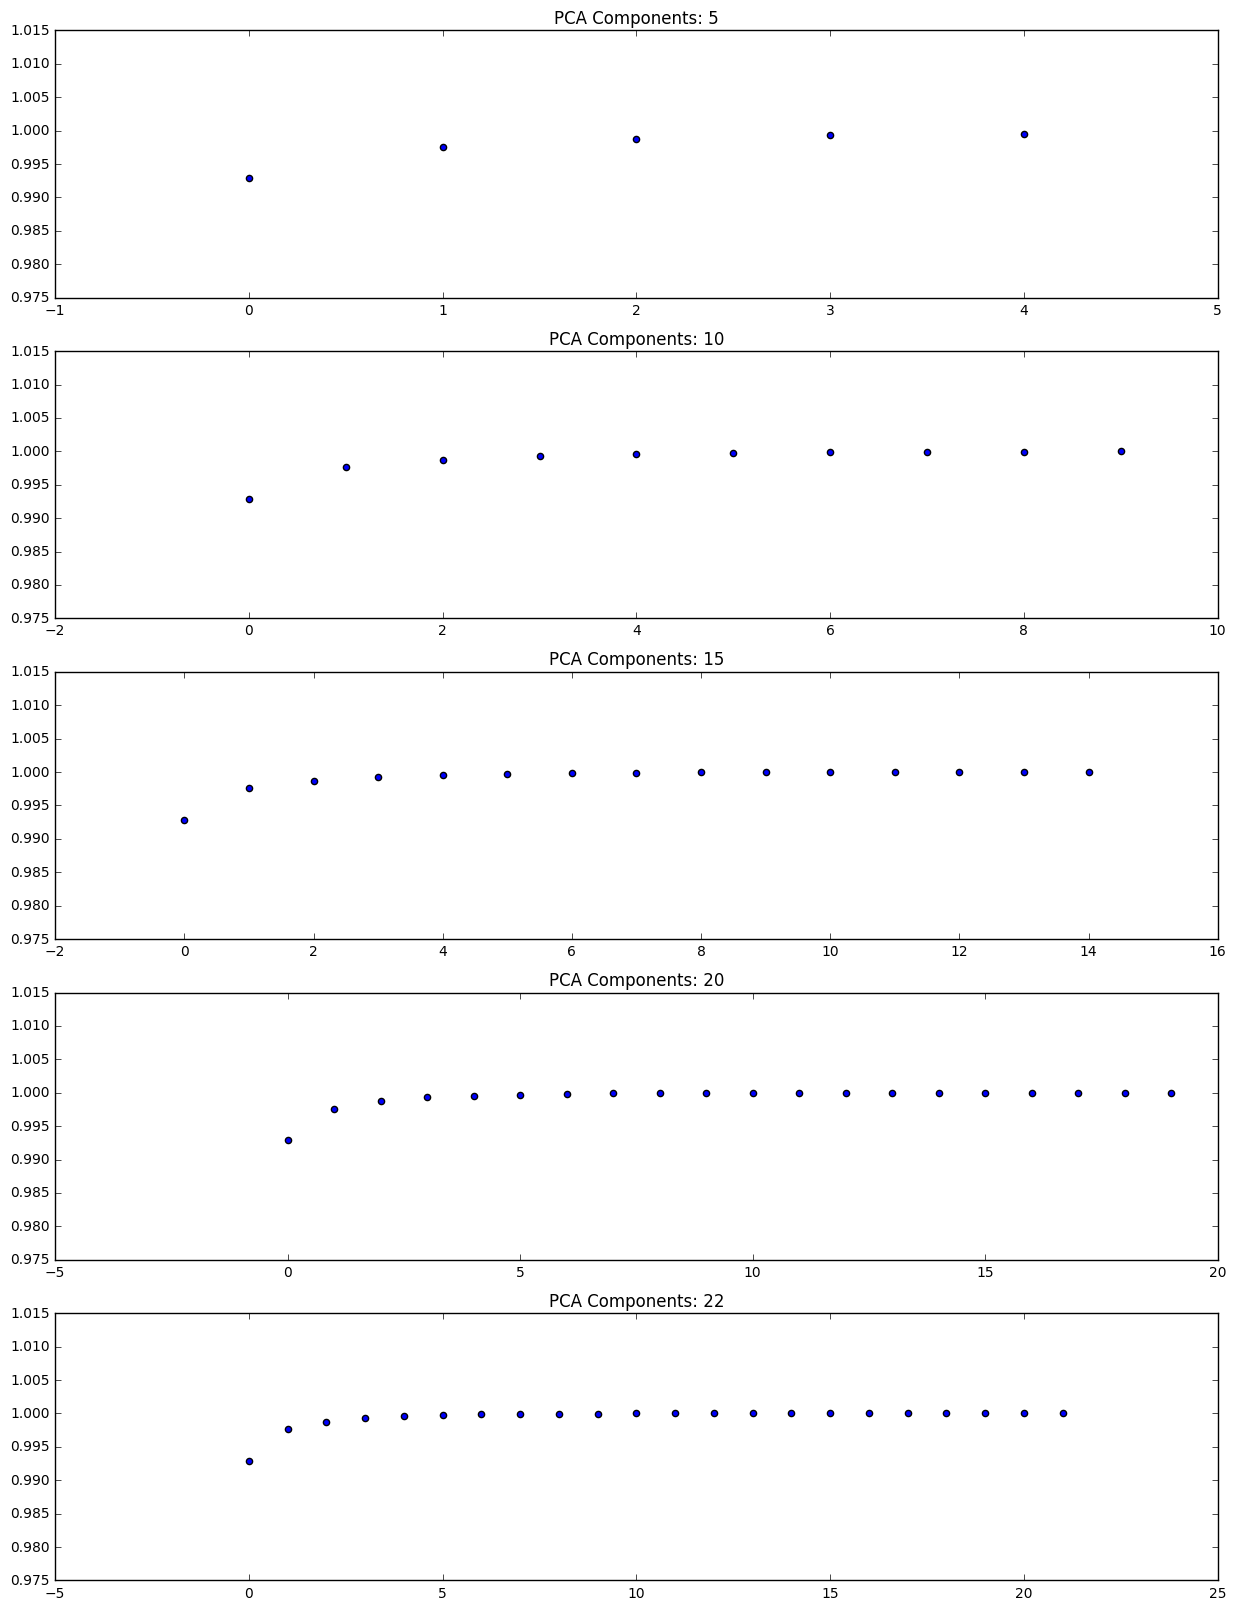

In [17]:
import matplotlib as mp
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
def PCA_Plot():
    pca_feat = [5,10,15,20,22]
    plt.figure(figsize=(15,20))

    # Loop through the pca component values
    for i in range(len(pca_feat)):

        # Fit PCA
        k_pca = PCA(n_components=pca_feat[i]).fit(data)

        # Establish temporary variables
        cum_vars = []
        p1_cum_var = 0
        target=0

        # Create Subplot
        ax = plt.subplot(len(pca_feat),1,i+1)

        # loop through each individual PCA component and create a list of the 
        # incremental increases of explained variance
        for k in range(pca_feat[i]):
            p1_cum_var += k_pca.explained_variance_ratio_[k]
            cum_vars.append(p1_cum_var)

            # Identify the point where we have 90% explained variance
            if((p1_cum_var >= 0.99) & (target==0)):
                target = k 

        # Plot the data
        plt.scatter(range(pca_feat[i]),cum_vars)
        plt.title("PCA Components: %s" % pca_feat[i])
    print ("99% explained variance achieved at:", target, "components")
    plt.show()
PCA_Plot()

6066
[[  1.54891406e+05  -1.36245755e+03]
 [  1.05782972e+05  -2.83996028e+03]
 [  6.10427737e+04   2.61402018e+02]
 [  3.46595362e+04  -1.39842878e+03]
 [  2.68698621e+04  -1.84947639e+03]
 [  1.86636017e+04  -4.24617306e+03]
 [ -3.14468245e+04  -1.61617856e+03]
 [ -2.32772917e+04   1.14629211e+02]
 [  4.14550496e+04  -2.96810912e+03]
 [ -3.30021083e+04  -2.31731499e+03]]
(6066, 2)
(6066, 1)
(6066, 3)
(4599, 3)
(1467, 3)


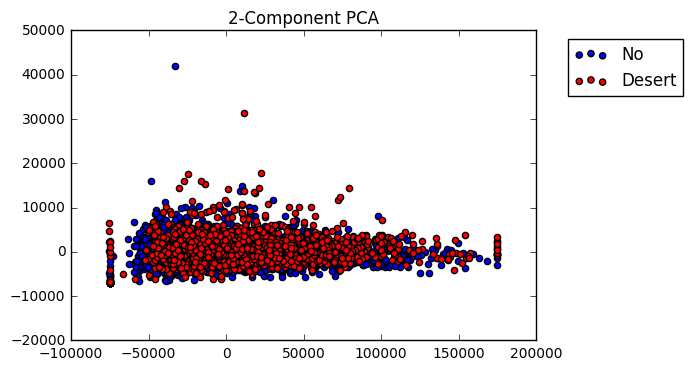

K: 1 F1: 0.659757330637
K: 3 F1: 0.704752275025
K: 5 F1: 0.713346814965
K: 7 F1: 0.724974721941
K: 9 F1: 0.736097067745
K: 11 F1: 0.739635995956
K: 13 F1: 0.745197168857
K: 15 F1: 0.742669362993


/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:31: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


In [69]:
#Using original labels

def PCA_Scatter():
    # Fit 2-dimensional PCA
    pca_2d=PCA(n_components=2)
    pca_train = pca_2d.fit_transform(split_train_data)
    pca_test = pca_2d.fit_transform(split_test_data)
    print(split_train_data.shape[0])
    print(pca_train[0:10])
    print(pca_train.shape)

    #Split 2d PCA data into desert and non-desert sets
    print(split_train_labels2.shape)
    f = np.concatenate((pca_train, split_train_labels), axis=1)
    print(f.shape)
    pca_train_no = f[np.where(f[:,2]==0)]
    print(pca_train_no.shape)
    pca_train_yes = f[np.where(f[:,2]==1)]
    print(pca_train_yes.shape)
    
    # Plot the data
    plt.scatter(pca_train_no[:,0],pca_train_no[:,1],c='blue',label="No")
    plt.scatter(pca_train_yes[:,0],pca_train_yes[:,1],c='red',label="Desert")


    plt.legend(bbox_to_anchor=(1.05, 1),loc=2)
    plt.title("2-Component PCA")
    plt.show()
    for i in [1,3,5,7,9,11,13,15]:
        knn = KNeighborsClassifier(n_neighbors=i)
        knn.fit(pca_train, split_train_labels)
        test_preds = knn.predict(pca_test)
        print ("K:", i, "F1:", metrics.accuracy_score(split_test_labels, test_preds))
PCA_Scatter()